In [ ]:
!pip install datasets

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 480.6/480.6 kB 12.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 5.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 179.3/179.3 kB 7.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 5.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 13.6 MB/s eta 0:00:00
  Attempting uninstall: fsspec
    Found existing installation: fsspec 2024.10.0
    Uninstalling fsspec-2024.10.0:
      Successfully uninstalled fsspec-2024.10.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
gcsfs 2024.10.0 requires fsspec==2024.10.0, but you have fsspec 2024.9.0 which is incompatible.


# Modelo BERT para multietiqueta

# Entrenamiento del modelo


**epochs = 10**

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Epoch 1/10 - Loss: 0.4799
Epoch 2/10 - Loss: 0.3586
Epoch 3/10 - Loss: 0.3140
Epoch 4/10 - Loss: 0.2893
Epoch 5/10 - Loss: 0.2719
Epoch 6/10 - Loss: 0.2517
Epoch 7/10 - Loss: 0.2335
Epoch 8/10 - Loss: 0.2154
Epoch 9/10 - Loss: 0.1973
Epoch 10/10 - Loss: 0.1776


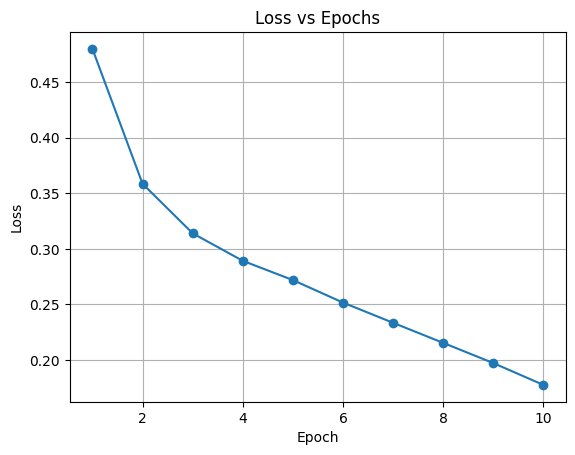

Classification Report - Validación
              precision    recall  f1-score   support

 Adventurous       0.63      0.82      0.71        56
       Angry       0.00      0.00      0.00        17
     Excited       0.00      0.00      0.00         3
       Funny       0.83      0.81      0.82        59
       Happy       0.68      0.90      0.78        52
Heartwarming       0.00      0.00      0.00         8
     Hopeful       0.00      0.00      0.00         4
   Inspiring       0.46      0.75      0.57        53
   Nostalgic       0.00      0.00      0.00         1
    Romantic       0.77      0.53      0.62        19
         Sad       0.73      0.85      0.79        54
      Scared       0.43      0.45      0.44        20
 Suspenseful       0.62      0.85      0.72        54

   micro avg       0.64      0.73      0.68       400
   macro avg       0.40      0.46      0.42       400
weighted avg       0.60      0.73      0.65       400
 samples avg       0.65      0.73      0.68  

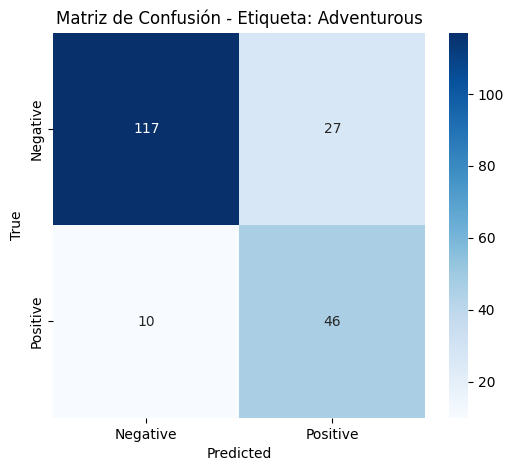

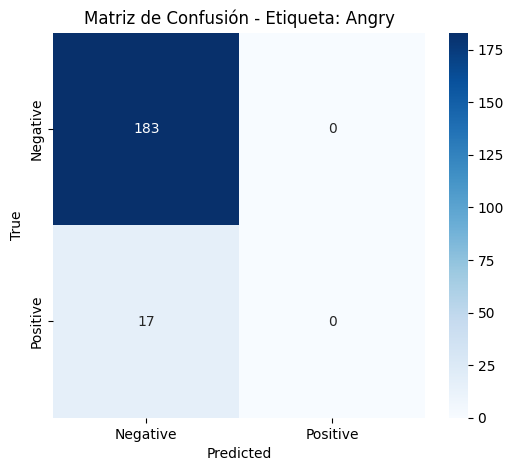

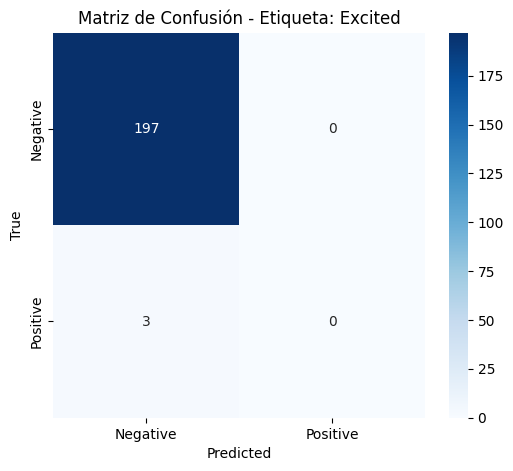

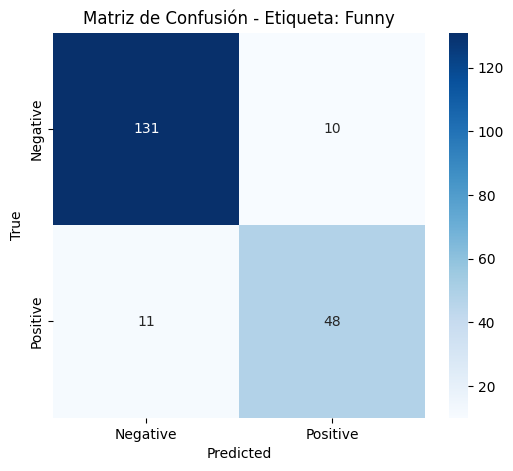

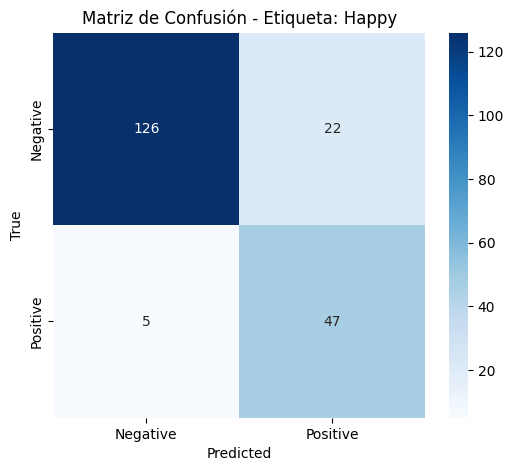

Generando Reporte de Métricas Personalizado...
        Etiqueta  Precisión    Recall  F1-Score ROC-AUC
0    Adventurous   0.630137  0.821429  0.713178    None
1          Angry   0.000000  0.000000  0.000000    None
2        Excited   0.000000  0.000000  0.000000    None
3          Funny   0.827586  0.813559  0.820513    None
4          Happy   0.681159  0.903846  0.776860    None
5   Heartwarming   0.000000  0.000000  0.000000    None
6        Hopeful   0.000000  0.000000  0.000000    None
7      Inspiring   0.459770  0.754717  0.571429    None
8      Nostalgic   0.000000  0.000000  0.000000    None
9       Romantic   0.769231  0.526316  0.625000    None
10           Sad   0.730159  0.851852  0.786325    None
11        Scared   0.428571  0.450000  0.439024    None
12   Suspenseful   0.621622  0.851852  0.718750    None
Reporte de métricas guardado como 'metrics_report_movies.csv'.
Dataset completo con predicciones guardado como 'complete_movies_predictions20.csv'.


In [ ]:
# Importar librerías necesarias
import torch
from transformers import BertTokenizer, BertForSequenceClassification
from torch.utils.data import DataLoader, TensorDataset
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import multilabel_confusion_matrix, precision_score, recall_score, f1_score, roc_auc_score, classification_report
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Leer la muestra y el dataset completo
df_sample = pd.read_csv('sample_movies_ready_for_bert.csv')
df_complete = pd.read_csv('movies_ready_for_bert.csv')

# Configuración del tokenizador
tokenizer = BertTokenizer.from_pretrained("bert-base-uncased")
max_len = 128

# Tokenizar la columna 'bert_input' de la muestra
encodings = tokenizer(
    df_sample['bert_input'].tolist(),
    max_length=max_len,
    padding="max_length",
    truncation=True,
    return_tensors="pt"
)

# Crear tensores para entradas y máscaras de atención
input_ids, attention_mask = encodings["input_ids"], encodings["attention_mask"]

# Binarizar las emociones (columna 'emotion')
mlb = MultiLabelBinarizer()
labels = mlb.fit_transform(df_sample['emotion'].str.split(", "))
labels_tensor = torch.tensor(labels, dtype=torch.float32)

# Dividir datos en conjuntos de entrenamiento y validación
train_inputs, val_inputs, train_masks, val_masks, train_labels, val_labels = train_test_split(
    input_ids, attention_mask, labels_tensor, test_size=0.2, random_state=42
)

# Crear DataLoaders para manejar los datos por lotes
batch_size = 16

train_data = TensorDataset(train_inputs, train_masks, train_labels)
train_dataloader = DataLoader(train_data, batch_size=batch_size, shuffle=True)

val_data = TensorDataset(val_inputs, val_masks, val_labels)
val_dataloader = DataLoader(val_data, batch_size=batch_size)

# Modelo BERT para clasificación multietiqueta
class BertForMultilabelClassification(torch.nn.Module):
    def __init__(self, num_labels):
        super(BertForMultilabelClassification, self).__init__()
        self.bert = BertForSequenceClassification.from_pretrained("bert-base-uncased", num_labels=num_labels)

    def forward(self, input_ids, attention_mask):
        outputs = self.bert(input_ids=input_ids, attention_mask=attention_mask)
        return torch.sigmoid(outputs.logits)

model = BertForMultilabelClassification(num_labels=len(mlb.classes_))
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

# Configuración del optimizador y función de pérdida
optimizer = torch.optim.AdamW(model.parameters(), lr=2e-5)
criterion = torch.nn.BCELoss()

# Lista para guardar la pérdida por época
loss_values = []

# Entrenamiento del modelo
epochs = 10
for epoch in range(epochs):
    model.train()
    total_loss = 0
    for batch in train_dataloader:
        input_ids, masks, labels = [b.to(device) for b in batch]

        optimizer.zero_grad()
        outputs = model(input_ids, attention_mask=masks)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        total_loss += loss.item()

    avg_loss = total_loss / len(train_dataloader)
    loss_values.append(avg_loss)
    print(f"Epoch {epoch + 1}/{epochs} - Loss: {avg_loss:.4f}")

# Gráfica de la función de pérdida
plt.plot(range(1, epochs + 1), loss_values, marker='o')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Loss vs Epochs')
plt.grid()
plt.show()

# Validación del modelo en el conjunto de validación
model.eval()
all_preds_val = []
all_labels_val = []

with torch.no_grad():
    for batch in val_dataloader:
        input_ids, masks, labels = [b.to(device) for b in batch]
        outputs = model(input_ids, attention_mask=masks)
        preds = (outputs > 0.3).int()  # Umbral de 0.3
        all_preds_val.append(preds.cpu())
        all_labels_val.append(labels.cpu())

# Concatenar resultados de validación
all_preds_val = torch.cat(all_preds_val)
all_labels_val = torch.cat(all_labels_val)

# Classification report en el conjunto de validación
print("Classification Report - Validación")
print(classification_report(all_labels_val, all_preds_val, target_names=mlb.classes_, zero_division=0))

# Tokenizar el dataset completo
encodings_complete = tokenizer(
    df_complete['bert_input'].tolist(),
    max_length=max_len,
    padding="max_length",
    truncation=True,
    return_tensors="pt"
)

# Crear DataLoader para predicción en el dataset completo
input_ids_complete = encodings_complete["input_ids"]
attention_mask_complete = encodings_complete["attention_mask"]
complete_data = TensorDataset(input_ids_complete, attention_mask_complete)
complete_dataloader = DataLoader(complete_data, batch_size=8)

# Realizar predicciones en el dataset completo
all_predictions = []
with torch.no_grad():
    for batch in complete_dataloader:
        input_ids_batch, attention_mask_batch = [b.to(device) for b in batch]
        outputs = model(input_ids_batch, attention_mask=attention_mask_batch)
        predictions = (outputs > 0.3).int()  # Umbral reducido a 0.3
        all_predictions.append(predictions.cpu())

# Concatenar todas las predicciones
all_predictions = torch.cat(all_predictions)

# Convertir predicciones a etiquetas
predicted_emotions = [
    [mlb.classes_[i] for i, val in enumerate(pred) if val == 1]
    for pred in all_predictions.numpy()
]

# Agregar predicciones al DataFrame completo
df_complete['predicted_emotions'] = ["; ".join(emotions) for emotions in predicted_emotions]

# **Matriz de Confusión Multietiqueta**
print("Generando Matriz de Confusión Multietiqueta...")
confusion_matrices = multilabel_confusion_matrix(all_labels_val.numpy(), all_preds_val.numpy())
for i, matrix in enumerate(confusion_matrices[:5]):  # Cambia el rango según necesidad
    plt.figure(figsize=(6, 5))
    sns.heatmap(matrix, annot=True, fmt='d', cmap='Blues',
                xticklabels=['Negative', 'Positive'],
                yticklabels=['Negative', 'Positive'])
    plt.title(f'Matriz de Confusión - Etiqueta: {mlb.classes_[i]}')
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.show()

# **Reporte de Métricas Personalizado**
print("Generando Reporte de Métricas Personalizado...")
metrics = []
for i, label in enumerate(mlb.classes_):
    precision = precision_score(all_labels_val.numpy()[:, i], all_preds_val.numpy()[:, i], zero_division=0)
    recall = recall_score(all_labels_val.numpy()[:, i], all_preds_val.numpy()[:, i], zero_division=0)
    f1 = f1_score(all_labels_val.numpy()[:, i], all_preds_val.numpy()[:, i], zero_division=0)
    try:
        auc = roc_auc_score(all_labels_val.numpy()[:, i], all_predictions.numpy()[:, i])
    except ValueError:
        auc = None
    metrics.append((label, precision, recall, f1, auc))

# Crear DataFrame para visualizar las métricas
df_metrics = pd.DataFrame(metrics, columns=["Etiqueta", "Precisión", "Recall", "F1-Score", "ROC-AUC"])
print(df_metrics)

# Guardar el reporte en un archivo CSV
df_metrics.to_csv('metrics_report10_movies.csv', index=False)
print("Reporte de métricas guardado como 'metrics_report_movies.csv'.")

# Guardar el dataset completo con las predicciones
df_complete.to_csv('movies_predictions10.csv', index=False)
print("Dataset completo con predicciones guardado como 'complete_movies_predictions20.csv'.")


**epochs = 15**

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Epoch 1/15 - Loss: 0.4815
Epoch 2/15 - Loss: 0.3759
Epoch 3/15 - Loss: 0.3251
Epoch 4/15 - Loss: 0.2965
Epoch 5/15 - Loss: 0.2787
Epoch 6/15 - Loss: 0.2594
Epoch 7/15 - Loss: 0.2389
Epoch 8/15 - Loss: 0.2195
Epoch 9/15 - Loss: 0.1993
Epoch 10/15 - Loss: 0.1797
Epoch 11/15 - Loss: 0.1616
Epoch 12/15 - Loss: 0.1459
Epoch 13/15 - Loss: 0.1327
Epoch 14/15 - Loss: 0.1209
Epoch 15/15 - Loss: 0.1078


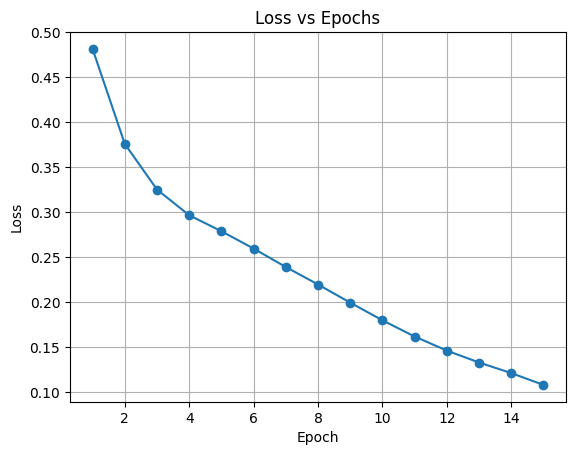

Classification Report - Validación
              precision    recall  f1-score   support

 Adventurous       0.72      0.82      0.77        56
       Angry       0.17      0.06      0.09        17
     Excited       0.00      0.00      0.00         3
       Funny       0.83      0.85      0.84        59
       Happy       0.65      0.87      0.74        52
Heartwarming       0.00      0.00      0.00         8
     Hopeful       0.00      0.00      0.00         4
   Inspiring       0.46      0.66      0.54        53
   Nostalgic       0.00      0.00      0.00         1
    Romantic       0.56      0.53      0.54        19
         Sad       0.75      0.80      0.77        54
      Scared       0.50      0.40      0.44        20
 Suspenseful       0.70      0.81      0.75        54

   micro avg       0.66      0.70      0.68       400
   macro avg       0.41      0.45      0.42       400
weighted avg       0.62      0.70      0.66       400
 samples avg       0.67      0.70      0.68  

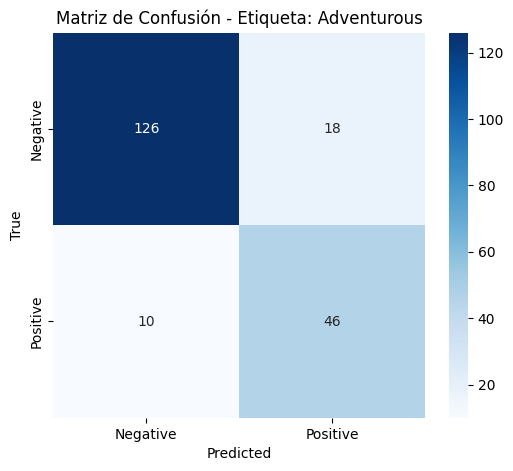

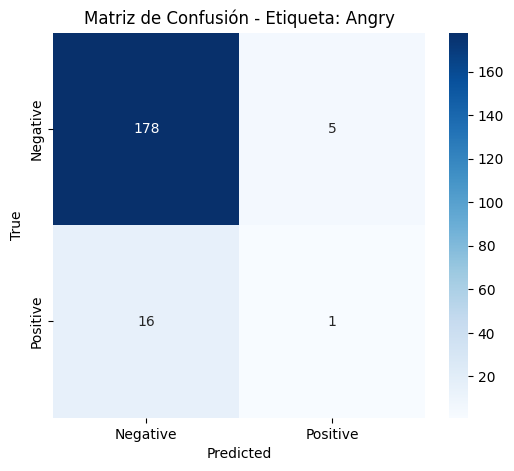

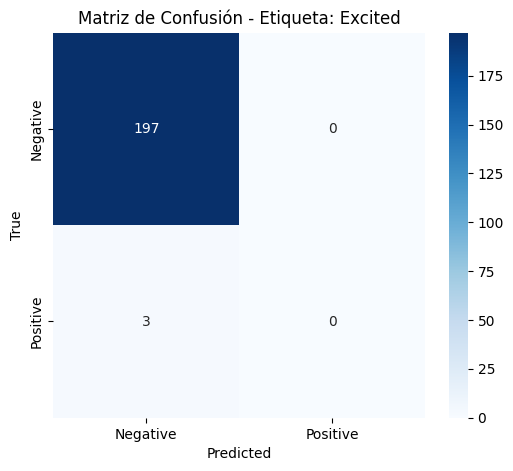

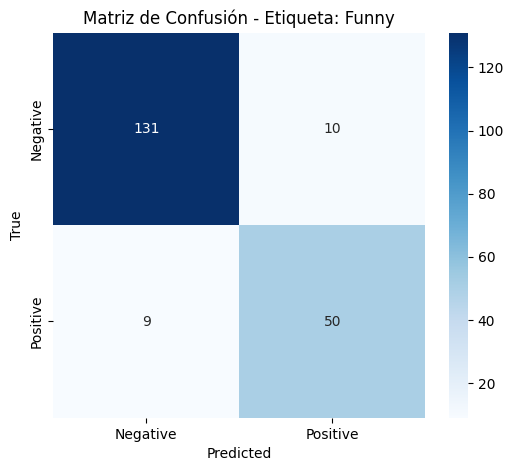

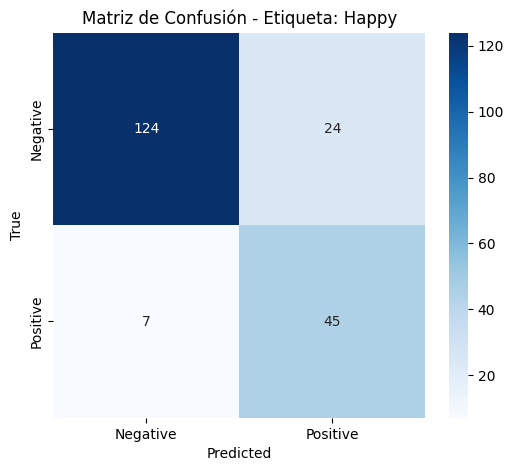

Generando Reporte de Métricas Personalizado...
        Etiqueta  Precisión    Recall  F1-Score ROC-AUC
0    Adventurous   0.718750  0.821429  0.766667    None
1          Angry   0.166667  0.058824  0.086957    None
2        Excited   0.000000  0.000000  0.000000    None
3          Funny   0.833333  0.847458  0.840336    None
4          Happy   0.652174  0.865385  0.743802    None
5   Heartwarming   0.000000  0.000000  0.000000    None
6        Hopeful   0.000000  0.000000  0.000000    None
7      Inspiring   0.460526  0.660377  0.542636    None
8      Nostalgic   0.000000  0.000000  0.000000    None
9       Romantic   0.555556  0.526316  0.540541    None
10           Sad   0.754386  0.796296  0.774775    None
11        Scared   0.500000  0.400000  0.444444    None
12   Suspenseful   0.698413  0.814815  0.752137    None
Reporte de métricas guardado como 'metrics_report_movies.csv'.
Dataset completo con predicciones guardado como 'complete_movies_predictions20.csv'.


In [ ]:
# Importar librerías necesarias
import torch
from transformers import BertTokenizer, BertForSequenceClassification
from torch.utils.data import DataLoader, TensorDataset
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import multilabel_confusion_matrix, precision_score, recall_score, f1_score, roc_auc_score, classification_report
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Leer la muestra y el dataset completo
df_sample = pd.read_csv('sample_movies_ready_for_bert.csv')
df_complete = pd.read_csv('movies_ready_for_bert.csv')

# Configuración del tokenizador
tokenizer = BertTokenizer.from_pretrained("bert-base-uncased")
max_len = 128

# Tokenizar la columna 'bert_input' de la muestra
encodings = tokenizer(
    df_sample['bert_input'].tolist(),
    max_length=max_len,
    padding="max_length",
    truncation=True,
    return_tensors="pt"
)

# Crear tensores para entradas y máscaras de atención
input_ids, attention_mask = encodings["input_ids"], encodings["attention_mask"]

# Binarizar las emociones (columna 'emotion')
mlb = MultiLabelBinarizer()
labels = mlb.fit_transform(df_sample['emotion'].str.split(", "))
labels_tensor = torch.tensor(labels, dtype=torch.float32)

# Dividir datos en conjuntos de entrenamiento y validación
train_inputs, val_inputs, train_masks, val_masks, train_labels, val_labels = train_test_split(
    input_ids, attention_mask, labels_tensor, test_size=0.2, random_state=42
)

# Crear DataLoaders para manejar los datos por lotes
batch_size = 16

train_data = TensorDataset(train_inputs, train_masks, train_labels)
train_dataloader = DataLoader(train_data, batch_size=batch_size, shuffle=True)

val_data = TensorDataset(val_inputs, val_masks, val_labels)
val_dataloader = DataLoader(val_data, batch_size=batch_size)

# Modelo BERT para clasificación multietiqueta
class BertForMultilabelClassification(torch.nn.Module):
    def __init__(self, num_labels):
        super(BertForMultilabelClassification, self).__init__()
        self.bert = BertForSequenceClassification.from_pretrained("bert-base-uncased", num_labels=num_labels)

    def forward(self, input_ids, attention_mask):
        outputs = self.bert(input_ids=input_ids, attention_mask=attention_mask)
        return torch.sigmoid(outputs.logits)

model = BertForMultilabelClassification(num_labels=len(mlb.classes_))
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

# Configuración del optimizador y función de pérdida
optimizer = torch.optim.AdamW(model.parameters(), lr=2e-5)
criterion = torch.nn.BCELoss()

# Lista para guardar la pérdida por época
loss_values = []

# Entrenamiento del modelo
epochs = 15
for epoch in range(epochs):
    model.train()
    total_loss = 0
    for batch in train_dataloader:
        input_ids, masks, labels = [b.to(device) for b in batch]

        optimizer.zero_grad()
        outputs = model(input_ids, attention_mask=masks)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        total_loss += loss.item()

    avg_loss = total_loss / len(train_dataloader)
    loss_values.append(avg_loss)
    print(f"Epoch {epoch + 1}/{epochs} - Loss: {avg_loss:.4f}")

# Gráfica de la función de pérdida
plt.plot(range(1, epochs + 1), loss_values, marker='o')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Loss vs Epochs')
plt.grid()
plt.show()

# Validación del modelo en el conjunto de validación
model.eval()
all_preds_val = []
all_labels_val = []

with torch.no_grad():
    for batch in val_dataloader:
        input_ids, masks, labels = [b.to(device) for b in batch]
        outputs = model(input_ids, attention_mask=masks)
        preds = (outputs > 0.3).int()  # Umbral de 0.3
        all_preds_val.append(preds.cpu())
        all_labels_val.append(labels.cpu())

# Concatenar resultados de validación
all_preds_val = torch.cat(all_preds_val)
all_labels_val = torch.cat(all_labels_val)

# Classification report en el conjunto de validación
print("Classification Report - Validación")
print(classification_report(all_labels_val, all_preds_val, target_names=mlb.classes_, zero_division=0))

# Tokenizar el dataset completo
encodings_complete = tokenizer(
    df_complete['bert_input'].tolist(),
    max_length=max_len,
    padding="max_length",
    truncation=True,
    return_tensors="pt"
)

# Crear DataLoader para predicción en el dataset completo
input_ids_complete = encodings_complete["input_ids"]
attention_mask_complete = encodings_complete["attention_mask"]
complete_data = TensorDataset(input_ids_complete, attention_mask_complete)
complete_dataloader = DataLoader(complete_data, batch_size=8)

# Realizar predicciones en el dataset completo
all_predictions = []
with torch.no_grad():
    for batch in complete_dataloader:
        input_ids_batch, attention_mask_batch = [b.to(device) for b in batch]
        outputs = model(input_ids_batch, attention_mask=attention_mask_batch)
        predictions = (outputs > 0.3).int()  # Umbral reducido a 0.3
        all_predictions.append(predictions.cpu())

# Concatenar todas las predicciones
all_predictions = torch.cat(all_predictions)

# Convertir predicciones a etiquetas
predicted_emotions = [
    [mlb.classes_[i] for i, val in enumerate(pred) if val == 1]
    for pred in all_predictions.numpy()
]

# Agregar predicciones al DataFrame completo
df_complete['predicted_emotions'] = ["; ".join(emotions) for emotions in predicted_emotions]

# **Matriz de Confusión Multietiqueta**
print("Generando Matriz de Confusión Multietiqueta...")
confusion_matrices = multilabel_confusion_matrix(all_labels_val.numpy(), all_preds_val.numpy())
for i, matrix in enumerate(confusion_matrices[:5]):  # Cambia el rango según necesidad
    plt.figure(figsize=(6, 5))
    sns.heatmap(matrix, annot=True, fmt='d', cmap='Blues',
                xticklabels=['Negative', 'Positive'],
                yticklabels=['Negative', 'Positive'])
    plt.title(f'Matriz de Confusión - Etiqueta: {mlb.classes_[i]}')
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.show()

# **Reporte de Métricas Personalizado**
print("Generando Reporte de Métricas Personalizado...")
metrics = []
for i, label in enumerate(mlb.classes_):
    precision = precision_score(all_labels_val.numpy()[:, i], all_preds_val.numpy()[:, i], zero_division=0)
    recall = recall_score(all_labels_val.numpy()[:, i], all_preds_val.numpy()[:, i], zero_division=0)
    f1 = f1_score(all_labels_val.numpy()[:, i], all_preds_val.numpy()[:, i], zero_division=0)
    try:
        auc = roc_auc_score(all_labels_val.numpy()[:, i], all_predictions.numpy()[:, i])
    except ValueError:
        auc = None
    metrics.append((label, precision, recall, f1, auc))

# Crear DataFrame para visualizar las métricas
df_metrics = pd.DataFrame(metrics, columns=["Etiqueta", "Precisión", "Recall", "F1-Score", "ROC-AUC"])
print(df_metrics)

# Guardar el reporte en un archivo CSV
df_metrics.to_csv('metrics_report15_movies.csv', index=False)
print("Reporte de métricas guardado como 'metrics_report_movies.csv'.")

# Guardar el dataset completo con las predicciones
df_complete.to_csv('movies_predictions15.csv', index=False)
print("Dataset completo con predicciones guardado como 'complete_movies_predictions20.csv'.")

<Figure size 800x600 with 0 Axes>

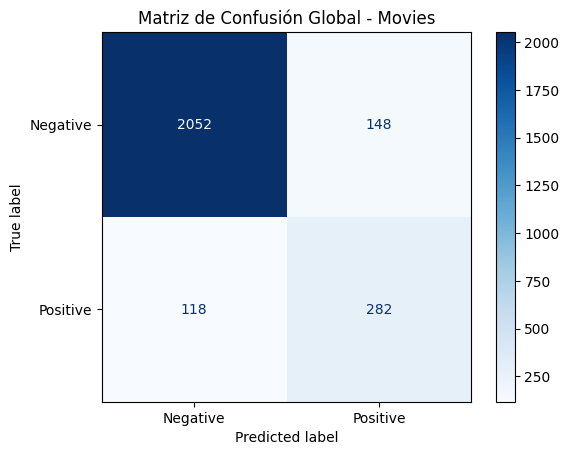

Resumen de métricas guardado como 'movies_confusion_metrics_summary.csv'.


In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Generar la matriz de confusión global para películas
y_true_global_movies = all_labels_val.numpy().ravel()
y_pred_global_movies = all_preds_val.numpy().ravel()

conf_matrix_global_movies = confusion_matrix(y_true_global_movies, y_pred_global_movies)

# Visualizar la matriz de confusión global para películas
plt.figure(figsize=(8, 6))
disp_movies = ConfusionMatrixDisplay(conf_matrix_global_movies, display_labels=["Negative", "Positive"])
disp_movies.plot(cmap="Blues", values_format="d")
plt.title("Matriz de Confusión Global - Movies")
plt.show()
# Calcular métricas a partir de la matriz de confusión global
tn_movies, fp_movies, fn_movies, tp_movies = conf_matrix_global_movies.ravel()

metrics_summary_movies = {
    "True Negatives (TN)": tn_movies,
    "False Positives (FP)": fp_movies,
    "False Negatives (FN)": fn_movies,
    "True Positives (TP)": tp_movies,
    "Accuracy": (tp_movies + tn_movies) / (tp_movies + tn_movies + fp_movies + fn_movies),
    "Precision": tp_movies / (tp_movies + fp_movies) if (tp_movies + fp_movies) > 0 else 0,
    "Recall": tp_movies / (tp_movies + fn_movies) if (tp_movies + fn_movies) > 0 else 0,
    "F1-Score": (2 * tp_movies / (2 * tp_movies + fp_movies + fn_movies)) if (2 * tp_movies + fp_movies + fn_movies) > 0 else 0
}

# Convertir el resumen a un DataFrame para facilitar el guardado
df_metrics_summary_movies = pd.DataFrame([metrics_summary_movies])
# Guardar el resumen en un archivo CSV
df_metrics_summary_movies.to_csv("movies_confusion_metrics_summary.csv", index=False)
print("Resumen de métricas guardado como 'movies_confusion_metrics_summary.csv'.")

# Modelo BERT seleccionado

Después de realizar las pruebas el mejor modelo es el de 20 epochs

Nuevamente se corre el código con 20 etapas, dado que el dataset cambio al agregar la columna de estandarización del genero

**Matriz de confusión global**

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Convertir los valores reales y predicciones a arreglos binarios globales
y_true_global = all_labels_val.numpy().ravel()
y_pred_global = all_preds_val.numpy().ravel()

# Generar la matriz de confusión global
conf_matrix_global = confusion_matrix(y_true_global, y_pred_global)

# Visualizar la matriz de confusión global
plt.figure(figsize=(8, 6))
disp = ConfusionMatrixDisplay(conf_matrix_global, display_labels=["Negative", "Positive"])
disp.plot(cmap="Blues", values_format="d")
plt.title("Matriz de Confusión Global")
plt.show()


20 etapas

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Epoch 1/20 - Loss: 0.4913
Epoch 2/20 - Loss: 0.3666
Epoch 3/20 - Loss: 0.3187
Epoch 4/20 - Loss: 0.2901
Epoch 5/20 - Loss: 0.2730
Epoch 6/20 - Loss: 0.2531
Epoch 7/20 - Loss: 0.2302
Epoch 8/20 - Loss: 0.2095
Epoch 9/20 - Loss: 0.1857
Epoch 10/20 - Loss: 0.1691
Epoch 11/20 - Loss: 0.1528
Epoch 12/20 - Loss: 0.1378
Epoch 13/20 - Loss: 0.1246
Epoch 14/20 - Loss: 0.1129
Epoch 15/20 - Loss: 0.1035
Epoch 16/20 - Loss: 0.0916
Epoch 17/20 - Loss: 0.0846
Epoch 18/20 - Loss: 0.0775
Epoch 19/20 - Loss: 0.0694
Epoch 20/20 - Loss: 0.0637


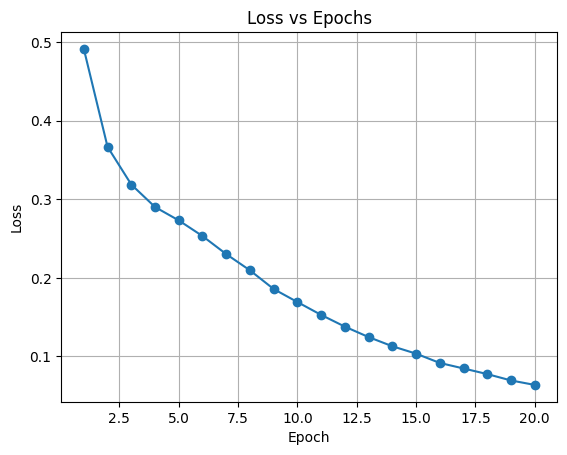

Classification Report - Validación
              precision    recall  f1-score   support

 Adventurous       0.73      0.77      0.75        56
       Angry       0.40      0.24      0.30        17
     Excited       0.00      0.00      0.00         3
       Funny       0.87      0.81      0.84        59
       Happy       0.66      0.88      0.75        52
Heartwarming       0.00      0.00      0.00         8
     Hopeful       0.00      0.00      0.00         4
   Inspiring       0.51      0.72      0.59        53
   Nostalgic       0.00      0.00      0.00         1
    Romantic       0.50      0.63      0.56        19
         Sad       0.72      0.76      0.74        54
      Scared       0.55      0.30      0.39        20
 Suspenseful       0.73      0.85      0.79        54

   micro avg       0.67      0.71      0.69       400
   macro avg       0.44      0.46      0.44       400
weighted avg       0.65      0.71      0.67       400
 samples avg       0.69      0.71      0.69  

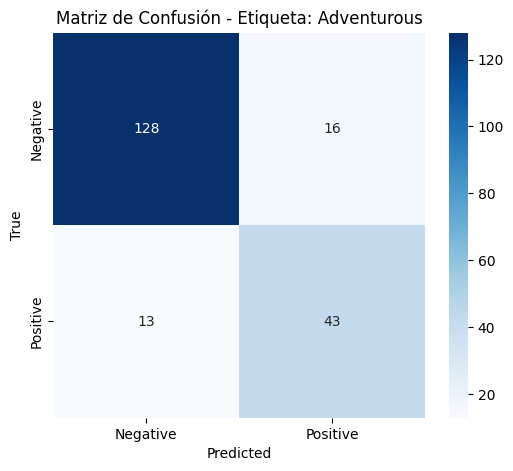

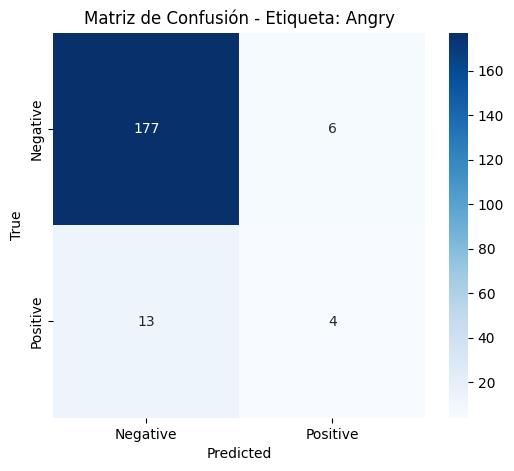

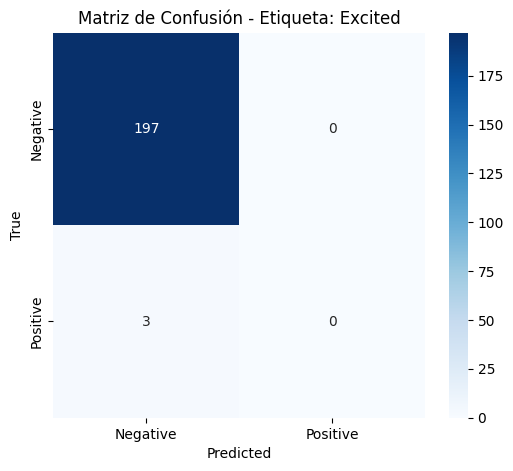

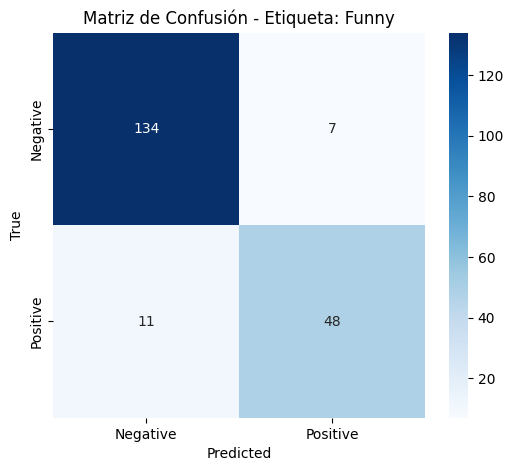

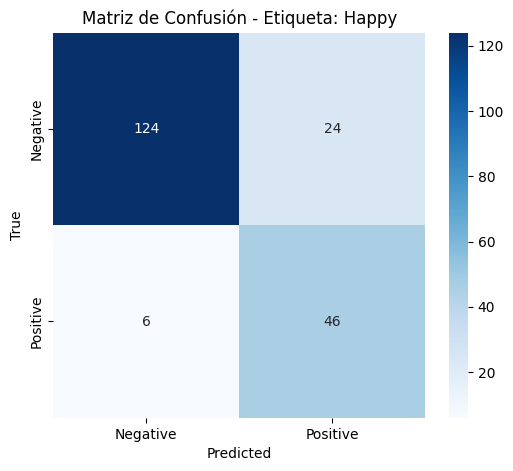

Generando Reporte de Métricas Personalizado...
        Etiqueta  Precisión    Recall  F1-Score ROC-AUC
0    Adventurous   0.728814  0.767857  0.747826    None
1          Angry   0.400000  0.235294  0.296296    None
2        Excited   0.000000  0.000000  0.000000    None
3          Funny   0.872727  0.813559  0.842105    None
4          Happy   0.657143  0.884615  0.754098    None
5   Heartwarming   0.000000  0.000000  0.000000    None
6        Hopeful   0.000000  0.000000  0.000000    None
7      Inspiring   0.506667  0.716981  0.593750    None
8      Nostalgic   0.000000  0.000000  0.000000    None
9       Romantic   0.500000  0.631579  0.558140    None
10           Sad   0.719298  0.759259  0.738739    None
11        Scared   0.545455  0.300000  0.387097    None
12   Suspenseful   0.730159  0.851852  0.786325    None
Reporte de métricas guardado como 'metrics_report_movies.csv'.
Dataset completo con predicciones guardado como 'complete_movies_predictions20.csv'.


In [ ]:
# Importar librerías necesarias
import torch
from transformers import BertTokenizer, BertForSequenceClassification
from torch.utils.data import DataLoader, TensorDataset
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import multilabel_confusion_matrix, precision_score, recall_score, f1_score, roc_auc_score, classification_report
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Leer la muestra y el dataset completo
df_sample = pd.read_csv('sample_movies_ready_for_bert.csv')
df_complete = pd.read_csv('movies_ready_for_bert.csv')

# Configuración del tokenizador
tokenizer = BertTokenizer.from_pretrained("bert-base-uncased")
max_len = 128

# Tokenizar la columna 'bert_input' de la muestra
encodings = tokenizer(
    df_sample['bert_input'].tolist(),
    max_length=max_len,
    padding="max_length",
    truncation=True,
    return_tensors="pt"
)

# Crear tensores para entradas y máscaras de atención
input_ids, attention_mask = encodings["input_ids"], encodings["attention_mask"]

# Binarizar las emociones (columna 'emotion')
mlb = MultiLabelBinarizer()
labels = mlb.fit_transform(df_sample['emotion'].str.split(", "))
labels_tensor = torch.tensor(labels, dtype=torch.float32)

# Dividir datos en conjuntos de entrenamiento y validación
train_inputs, val_inputs, train_masks, val_masks, train_labels, val_labels = train_test_split(
    input_ids, attention_mask, labels_tensor, test_size=0.2, random_state=42
)

# Crear DataLoaders para manejar los datos por lotes
batch_size = 16

train_data = TensorDataset(train_inputs, train_masks, train_labels)
train_dataloader = DataLoader(train_data, batch_size=batch_size, shuffle=True)

val_data = TensorDataset(val_inputs, val_masks, val_labels)
val_dataloader = DataLoader(val_data, batch_size=batch_size)

# Modelo BERT para clasificación multietiqueta
class BertForMultilabelClassification(torch.nn.Module):
    def __init__(self, num_labels):
        super(BertForMultilabelClassification, self).__init__()
        self.bert = BertForSequenceClassification.from_pretrained("bert-base-uncased", num_labels=num_labels)

    def forward(self, input_ids, attention_mask):
        outputs = self.bert(input_ids=input_ids, attention_mask=attention_mask)
        return torch.sigmoid(outputs.logits)

model = BertForMultilabelClassification(num_labels=len(mlb.classes_))
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

# Configuración del optimizador y función de pérdida
optimizer = torch.optim.AdamW(model.parameters(), lr=2e-5)
criterion = torch.nn.BCELoss()

# Lista para guardar la pérdida por época
loss_values = []

# Entrenamiento del modelo
epochs = 20
for epoch in range(epochs):
    model.train()
    total_loss = 0
    for batch in train_dataloader:
        input_ids, masks, labels = [b.to(device) for b in batch]

        optimizer.zero_grad()
        outputs = model(input_ids, attention_mask=masks)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        total_loss += loss.item()

    avg_loss = total_loss / len(train_dataloader)
    loss_values.append(avg_loss)
    print(f"Epoch {epoch + 1}/{epochs} - Loss: {avg_loss:.4f}")

# Gráfica de la función de pérdida
plt.plot(range(1, epochs + 1), loss_values, marker='o')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Loss vs Epochs')
plt.grid()
plt.show()

# Validación del modelo en el conjunto de validación
model.eval()
all_preds_val = []
all_labels_val = []

with torch.no_grad():
    for batch in val_dataloader:
        input_ids, masks, labels = [b.to(device) for b in batch]
        outputs = model(input_ids, attention_mask=masks)
        preds = (outputs > 0.3).int()  # Umbral de 0.3
        all_preds_val.append(preds.cpu())
        all_labels_val.append(labels.cpu())

# Concatenar resultados de validación
all_preds_val = torch.cat(all_preds_val)
all_labels_val = torch.cat(all_labels_val)

# Classification report en el conjunto de validación
print("Classification Report - Validación")
print(classification_report(all_labels_val, all_preds_val, target_names=mlb.classes_, zero_division=0))

# Tokenizar el dataset completo
encodings_complete = tokenizer(
    df_complete['bert_input'].tolist(),
    max_length=max_len,
    padding="max_length",
    truncation=True,
    return_tensors="pt"
)

# Crear DataLoader para predicción en el dataset completo
input_ids_complete = encodings_complete["input_ids"]
attention_mask_complete = encodings_complete["attention_mask"]
complete_data = TensorDataset(input_ids_complete, attention_mask_complete)
complete_dataloader = DataLoader(complete_data, batch_size=8)

# Realizar predicciones en el dataset completo
all_predictions = []
with torch.no_grad():
    for batch in complete_dataloader:
        input_ids_batch, attention_mask_batch = [b.to(device) for b in batch]
        outputs = model(input_ids_batch, attention_mask=attention_mask_batch)
        predictions = (outputs > 0.3).int()  # Umbral reducido a 0.3
        all_predictions.append(predictions.cpu())

# Concatenar todas las predicciones
all_predictions = torch.cat(all_predictions)

# Convertir predicciones a etiquetas
predicted_emotions = [
    [mlb.classes_[i] for i, val in enumerate(pred) if val == 1]
    for pred in all_predictions.numpy()
]

# Agregar predicciones al DataFrame completo
df_complete['predicted_emotions'] = ["; ".join(emotions) for emotions in predicted_emotions]

# **Matriz de Confusión Multietiqueta**
print("Generando Matriz de Confusión Multietiqueta...")
confusion_matrices = multilabel_confusion_matrix(all_labels_val.numpy(), all_preds_val.numpy())
for i, matrix in enumerate(confusion_matrices[:5]):  # Cambia el rango según necesidad
    plt.figure(figsize=(6, 5))
    sns.heatmap(matrix, annot=True, fmt='d', cmap='Blues',
                xticklabels=['Negative', 'Positive'],
                yticklabels=['Negative', 'Positive'])
    plt.title(f'Matriz de Confusión - Etiqueta: {mlb.classes_[i]}')
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.show()

# **Reporte de Métricas Personalizado**
print("Generando Reporte de Métricas Personalizado...")
metrics = []
for i, label in enumerate(mlb.classes_):
    precision = precision_score(all_labels_val.numpy()[:, i], all_preds_val.numpy()[:, i], zero_division=0)
    recall = recall_score(all_labels_val.numpy()[:, i], all_preds_val.numpy()[:, i], zero_division=0)
    f1 = f1_score(all_labels_val.numpy()[:, i], all_preds_val.numpy()[:, i], zero_division=0)
    try:
        auc = roc_auc_score(all_labels_val.numpy()[:, i], all_predictions.numpy()[:, i])
    except ValueError:
        auc = None
    metrics.append((label, precision, recall, f1, auc))

# Crear DataFrame para visualizar las métricas
df_metrics = pd.DataFrame(metrics, columns=["Etiqueta", "Precisión", "Recall", "F1-Score", "ROC-AUC"])
print(df_metrics)

# Guardar el reporte en un archivo CSV
df_metrics.to_csv('metrics_report20_movies.csv', index=False)
print("Reporte de métricas guardado como 'metrics_report_movies.csv'.")

# Guardar el dataset completo con las predicciones
df_complete.to_csv('movies_predictions20.csv', index=False)
print("Dataset completo con predicciones guardado como 'complete_movies_predictions20.csv'.")

<Figure size 800x600 with 0 Axes>

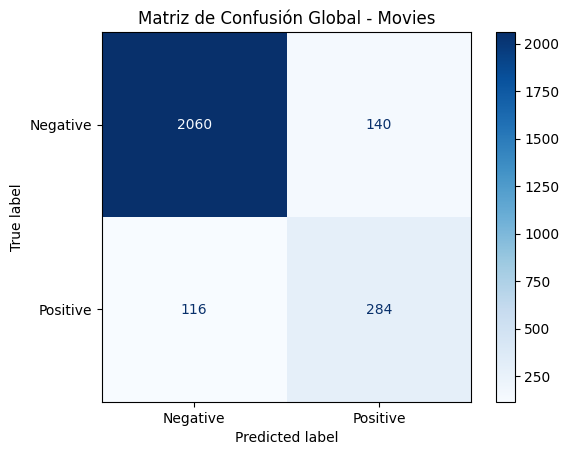

Resumen de métricas guardado como 'movies_confusion_metrics_summary.csv'.


In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Generar la matriz de confusión global para películas
y_true_global_movies = all_labels_val.numpy().ravel()
y_pred_global_movies = all_preds_val.numpy().ravel()

conf_matrix_global_movies = confusion_matrix(y_true_global_movies, y_pred_global_movies)

# Visualizar la matriz de confusión global para películas
plt.figure(figsize=(8, 6))
disp_movies = ConfusionMatrixDisplay(conf_matrix_global_movies, display_labels=["Negative", "Positive"])
disp_movies.plot(cmap="Blues", values_format="d")
plt.title("Matriz de Confusión Global - Movies")
plt.show()
# Calcular métricas a partir de la matriz de confusión global
tn_movies, fp_movies, fn_movies, tp_movies = conf_matrix_global_movies.ravel()

metrics_summary_movies = {
    "True Negatives (TN)": tn_movies,
    "False Positives (FP)": fp_movies,
    "False Negatives (FN)": fn_movies,
    "True Positives (TP)": tp_movies,
    "Accuracy": (tp_movies + tn_movies) / (tp_movies + tn_movies + fp_movies + fn_movies),
    "Precision": tp_movies / (tp_movies + fp_movies) if (tp_movies + fp_movies) > 0 else 0,
    "Recall": tp_movies / (tp_movies + fn_movies) if (tp_movies + fn_movies) > 0 else 0,
    "F1-Score": (2 * tp_movies / (2 * tp_movies + fp_movies + fn_movies)) if (2 * tp_movies + fp_movies + fn_movies) > 0 else 0
}

# Convertir el resumen a un DataFrame para facilitar el guardado
df_metrics_summary_movies = pd.DataFrame([metrics_summary_movies])
# Guardar el resumen en un archivo CSV
df_metrics_summary_movies.to_csv("movies_confusion_metrics_summary20.csv", index=False)
print("Resumen de métricas guardado como 'movies_confusion_metrics_summary.csv'.")